local maxima frequencies


/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/statsmodels/sandbox/tsa/try_arma_more.py:101: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  xacov = acovf(x, unbiased=False)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


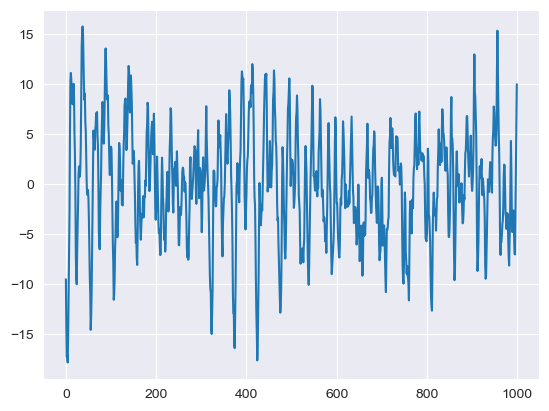

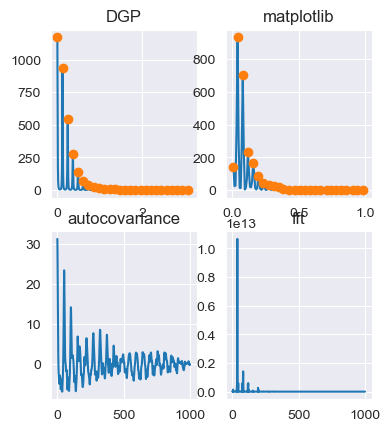

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from statsmodels.sandbox.tsa.try_arma_more import n_startup
from sklearn.decomposition import PCA

pd.options.display.float_format = '{:20,.2f}'.format
# display all columns by default 
pd.set_option('display.max_columns', 999)

# Data Exploration

In [49]:
# Load the data
df = pd.read_csv('data/customer_segmentation.csv') 
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,"58,138.00",0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"46,344.00",1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"71,613.00",0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"58,293.00",1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,"62,513.00",0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,"55,635.00",0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,"33,454.00",1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,"30,351.00",1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,"5,648.00",1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#describing our numerical data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,"2,240.00","2,240.00","2,216.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,"5,592.16","1,968.81","52,247.25",0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,"3,246.66",11.98,"25,173.08",0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,"1,893.00","1,730.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,"2,828.25","1,959.00","35,303.00",0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,"5,458.50","1,970.00","51,381.50",0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,"8,427.75","1,977.00","68,522.00",1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,"11,191.00","1,996.00","666,666.00",2.00,2.00,99.00,"1,493.00",199.00,"1,725.00",259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


Everything here looks fine, aside from some entries missing incomes.

In [6]:
#describing our categorical data
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [48]:
df[df["Income"].isnull()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalPurchases


Although we can still infer which customer made a purchase without the income data, income is likely a significant factor in determining how much a customer spends. We will drop these rows.

In [8]:
# Drop rows with missing income
df = df.dropna(subset=['Income'])

In [9]:
#checking for any duplicate entries
df.duplicated().sum()

0

In [10]:
#checking for any missing values now that we have removed the missing income entries
df.isnull().sum()   

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Data Visualization

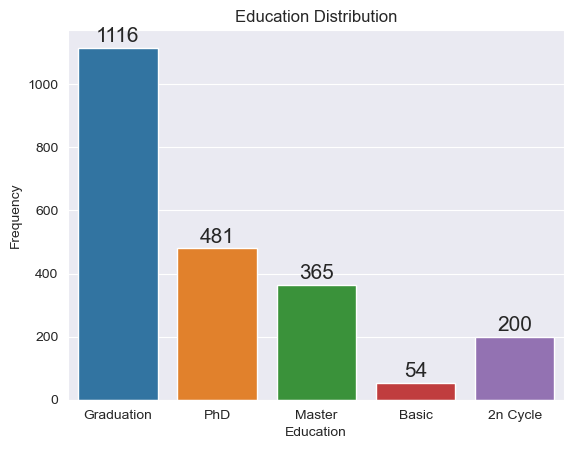

In [11]:
# displaying the education distribution
axes = sns.countplot(data=df, x='Education')
# displaying the frequency of each category
for bar in axes.patches:
    axes.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Education Distribution')
plt.ylabel('Frequency')
plt.show()

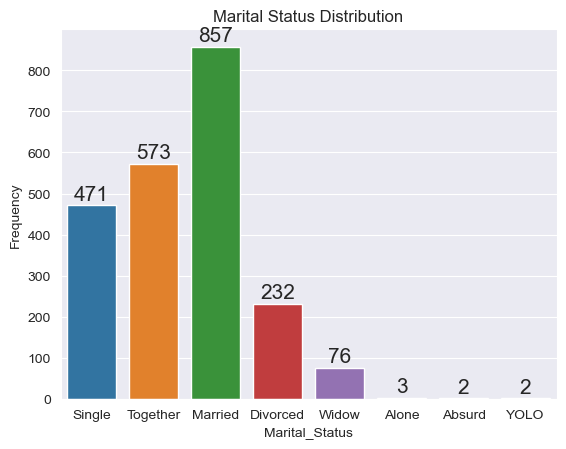

In [12]:
#displaying the marital status distribution
axes = sns.countplot(data=df, x='Marital_Status')
# displaying the frequency of each category
for bar in axes.patches:
    axes.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
        
plt.title('Marital Status Distribution')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Number of Children in Home by Marital Status')

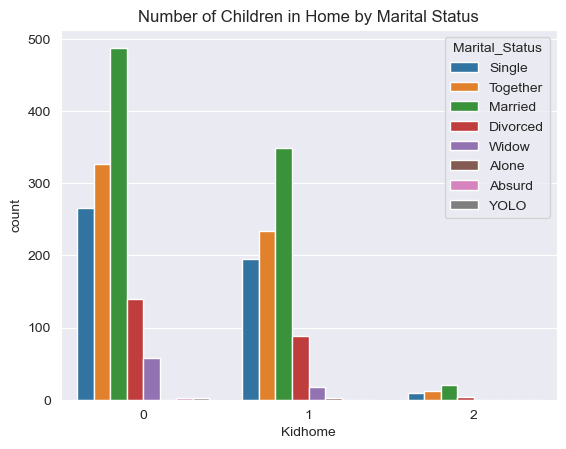

In [13]:
# displaying the number of children in the home based on martial status
sns.countplot(data=df, x='Kidhome', hue='Marital_Status')
plt.title('Number of Children in Home by Marital Status')

<Axes: xlabel='Teenhome', ylabel='count'>

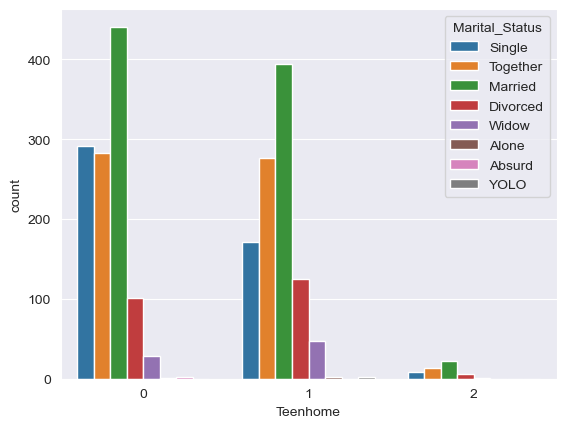

In [14]:
# and the same for the amount of teenagers in the home
sns.countplot(data=df, x='Teenhome', hue='Marital_Status')

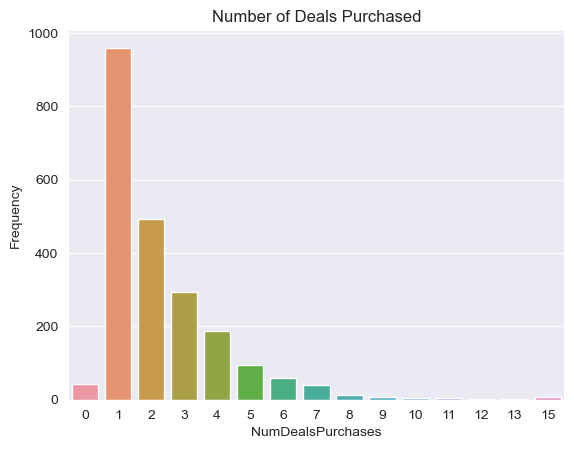

In [15]:
# displaying the number of purchases made by each customer
sns.countplot(data=df, x='NumDealsPurchases')
plt.title('Number of Deals Purchased')
plt.ylabel('Frequency')
plt.show()

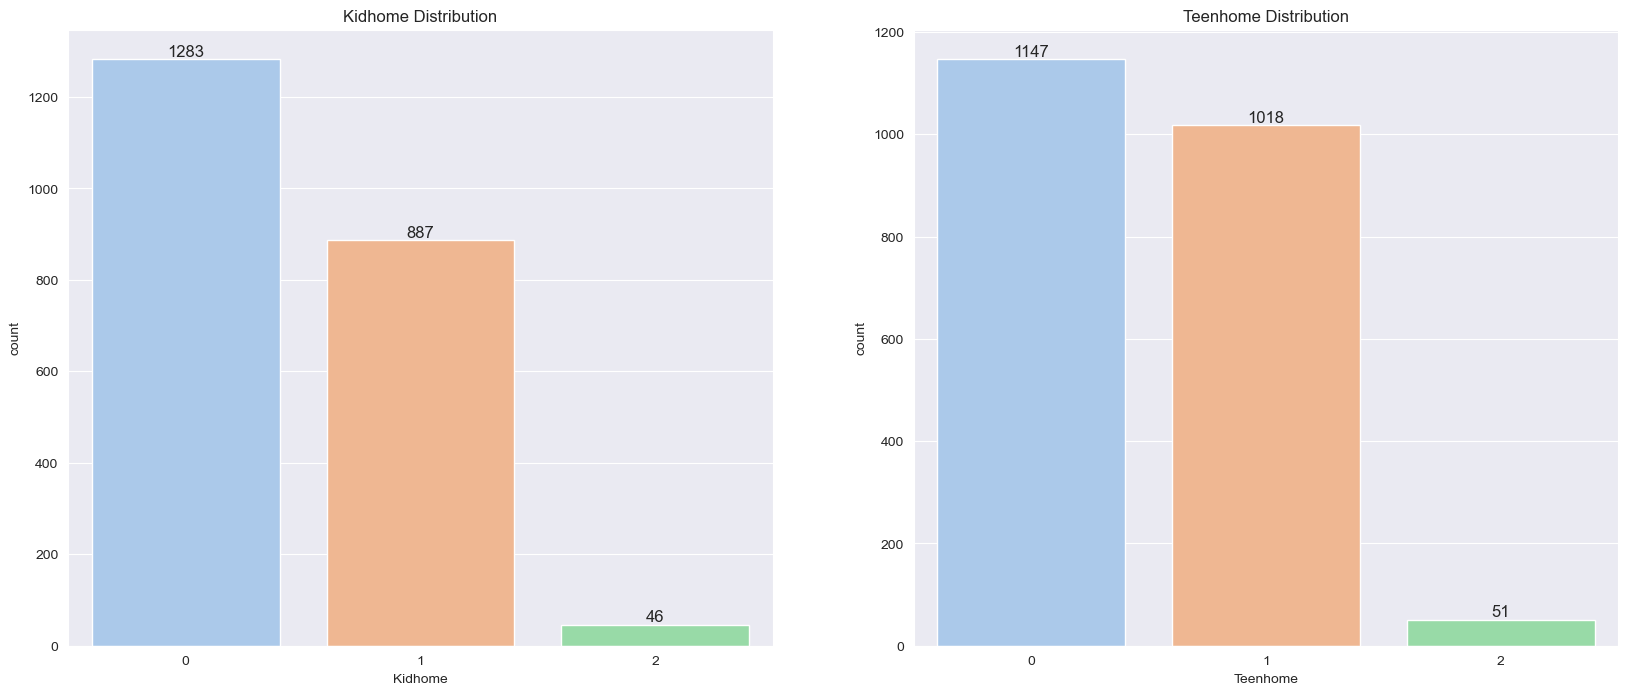

In [16]:
fig , Axes = plt.subplots(nrows=1 , ncols=2, figsize=(20,8))

#displaying the distribution of the number of children in the home
axes = sns.countplot(data= df, x='Kidhome', palette= 'pastel', ax= Axes[0])
Axes[0].set_title('Kidhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2. , y = height , s=int(height), ha='center', va='bottom',fontsize=12)



#displaying the distribution of the number of teenagers in the home
axes = sns.countplot(data=df, x='Teenhome', palette='pastel', ax= Axes[1])
Axes[1].set_title('Teenhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2, y = height, s= int(height), ha='center', va='bottom', fontsize=12)

plt.show()

/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


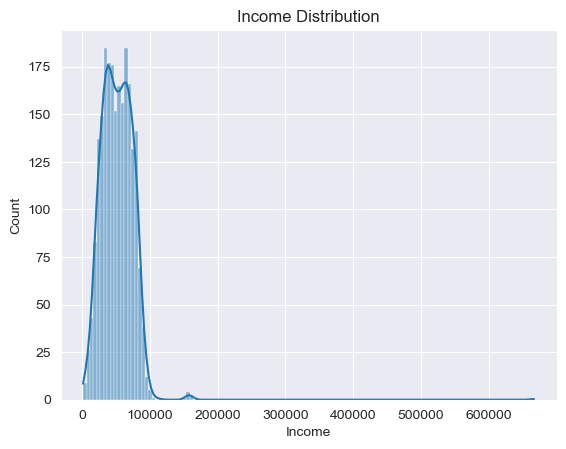

<Figure size 2000x1000 with 0 Axes>

In [17]:
# income distribution among customers
sns.histplot(data=df, x='Income', kde=True)
plt.title("Income Distribution")
plt.figure(figsize=(20, 10))
plt.show()

Text(0.5, 1.0, 'Income Distribution')

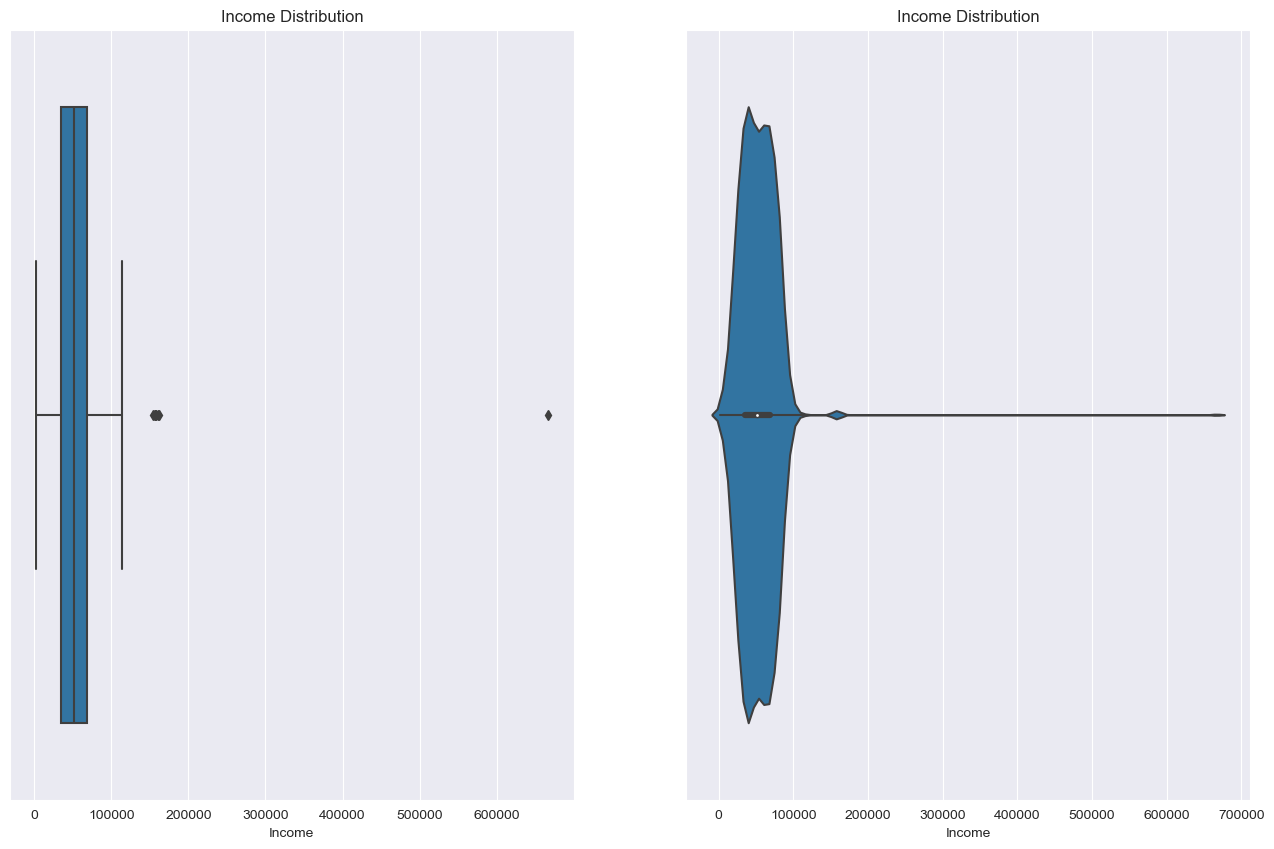

In [18]:
# visualzing the income distrbution to see outliers easier
plt.figure(figsize=(16, 10))    
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Income')
plt.title('Income Distribution')

plt.subplot(1,2,2)
sns.violinplot(data=df, x='Income')
plt.title('Income Distribution')    


Based on this, we can clearly see that there is one large outlier in the income data; a single customer with an income of over 600,000. We will remove this outlier.

In [19]:
df = df[df['Income'] < 150000]  

Text(0.5, 1.0, 'Income Distribution')

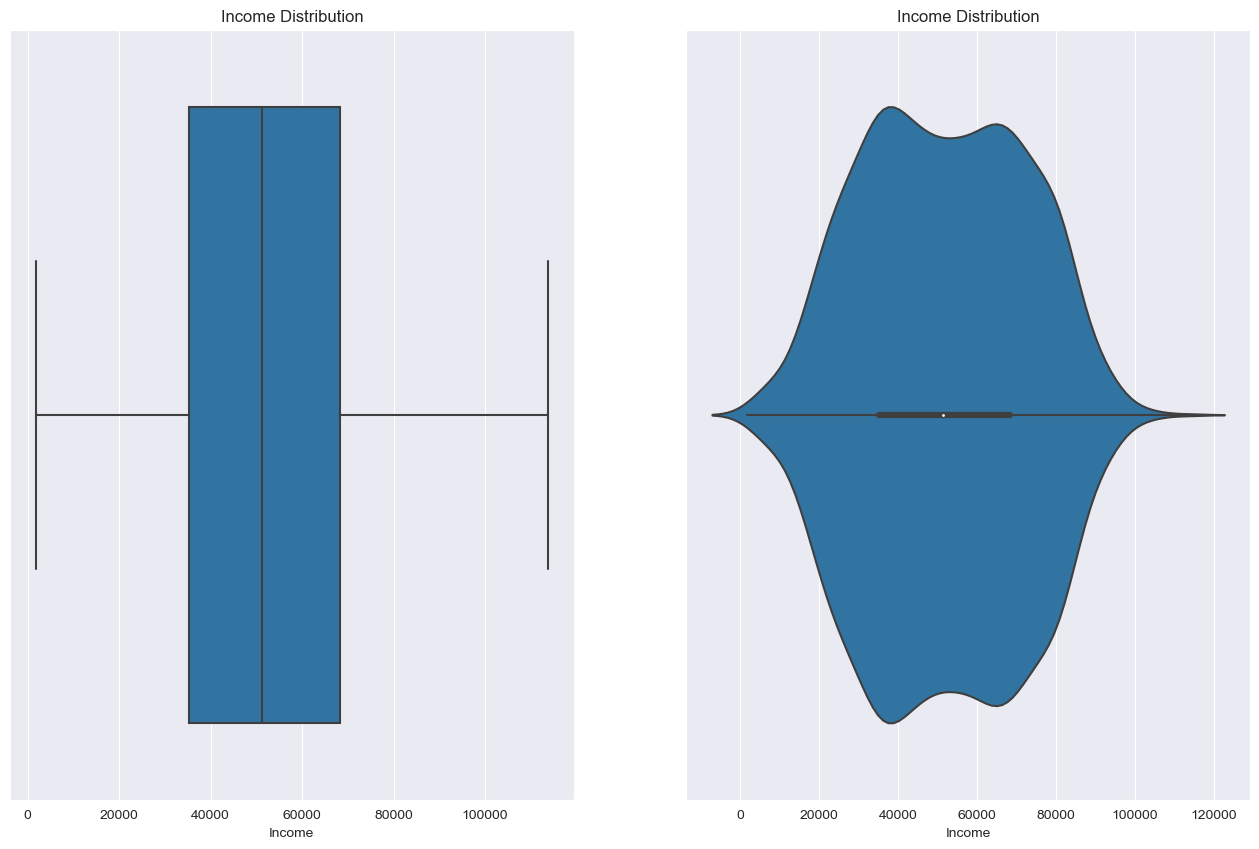

In [20]:
# replotting the income distribution
plt.figure(figsize=(16, 10))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Income')
plt.title('Income Distribution')

plt.subplot(1,2,2)
sns.violinplot(data=df, x='Income')
plt.title('Income Distribution')    

Much better

## Feature Engineering


In [50]:
# we can use the year of birth to calculate the age of the customer
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# we can also make a column for the total number of purchases made by each customer
df['TotalPurchases'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df.head(20)



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalPurchases
0,5524,1957,Graduation,Single,"58,138.00",0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,1617
1,2174,1954,Graduation,Single,"46,344.00",1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,27
2,4141,1965,Graduation,Together,"71,613.00",0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,776
3,6182,1984,Graduation,Together,"26,646.00",1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,53
4,5324,1981,PhD,Married,"58,293.00",1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,422
5,7446,1967,Master,Together,"62,513.00",0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,58,716
6,965,1971,Graduation,Divorced,"55,635.00",0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,54,590
7,6177,1985,PhD,Married,"33,454.00",1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,40,169
8,4855,1974,PhD,Together,"30,351.00",1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,51,46
9,5899,1950,PhD,Together,"5,648.00",1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,75,49


In [51]:
# we also need to encode the categorical columns
encoder = LabelEncoder()
df['Education'] = encoder.fit_transform(df['Education'])
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])
df.head(20)

'''
Single = 4
Together = 5
Divorced = 2
Married = 3
'''

'''
Graduation = 2
PhD = 4
Master = 3
2n Cycle = 0 
Basic = 1
'''

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalPurchases
0,5524,1957,2,4,"58,138.00",0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,1617
1,2174,1954,2,4,"46,344.00",1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,27
2,4141,1965,2,5,"71,613.00",0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,776
3,6182,1984,2,5,"26,646.00",1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,53
4,5324,1981,4,3,"58,293.00",1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,422
5,7446,1967,3,5,"62,513.00",0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,58,716
6,965,1971,2,2,"55,635.00",0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,54,590
7,6177,1985,4,3,"33,454.00",1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,40,169
8,4855,1974,4,5,"30,351.00",1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,51,46
9,5899,1950,4,5,"5,648.00",1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,75,49


In [23]:
# Now we can choose which columns to use for clustering
features = ['Income', 'Age', 'TotalPurchases', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Recency', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

cluster_df = df[features]   
cluster_df

,Income,Age,TotalPurchases,Education,Marital_Status,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,"58,138.00",68,1617,2,4,0,0,58,8,10,4,3,635,88,546,172,88,88
1,"46,344.00",71,27,2,4,1,1,38,1,1,2,2,11,1,6,2,1,6
2,"71,613.00",60,776,2,5,0,0,26,8,2,10,1,426,49,127,111,21,42
3,"26,646.00",41,53,2,5,1,0,26,2,0,4,2,11,4,20,10,3,5
4,"58,293.00",44,422,4,3,1,0,94,5,3,6,5,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,"61,223.00",58,1341,2,3,0,1,46,9,3,4,2,709,43,182,42,118,247
2236,"64,014.00",79,444,4,5,2,1,56,8,2,5,7,406,0,30,0,0,8
2237,"56,981.00",44,1241,2,2,0,0,91,2,3,13,1,908,48,217,32,12,24
2238,"69,245.00",69,843,3,5,0,1,8,6,5,10,2,428,30,214,80,30,61


In [24]:
# Features need to be scaled before we can cluster them - so that each of them contributes equally to the distance calculations
features_to_scale = ['Income', 'Age', 'TotalPurchases', 'Recency', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
scaler = RobustScaler()
cluster_df[features_to_scale] = scaler.fit_transform(cluster_df[features_to_scale])
cluster_df.head()

/var/folders/v7/43g09x6d23sb35sxhnq0gwm40000gn/T/ipykernel_14775/1254396265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df[features_to_scale] = scaler.fit_transform(cluster_df[features_to_scale])


,Income,Age,TotalPurchases,Education,Marital_Status,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0.21,0.72,1.25,2,4,0,0,0.18,1.00,2.00,-0.20,0.50,0.95,2.58,2.21,3.40,2.42,1.33
1,-0.15,0.89,-0.38,2,4,1,1,-0.22,-0.75,-0.25,-0.60,0.00,-0.34,-0.23,-0.29,-0.21,-0.21,-0.40
2,0.61,0.28,0.39,2,5,0,0,-0.46,1.00,0.00,1.00,-0.50,0.51,1.32,0.27,2.11,0.39,0.36
3,-0.75,-0.78,-0.35,2,5,1,0,-0.46,-0.50,-0.50,-0.20,0.00,-0.34,-0.13,-0.22,-0.04,-0.15,-0.42
4,0.21,-0.61,0.03,4,3,1,0,0.90,0.25,0.25,0.20,1.50,-0.01,1.13,0.23,0.72,0.58,-0.21


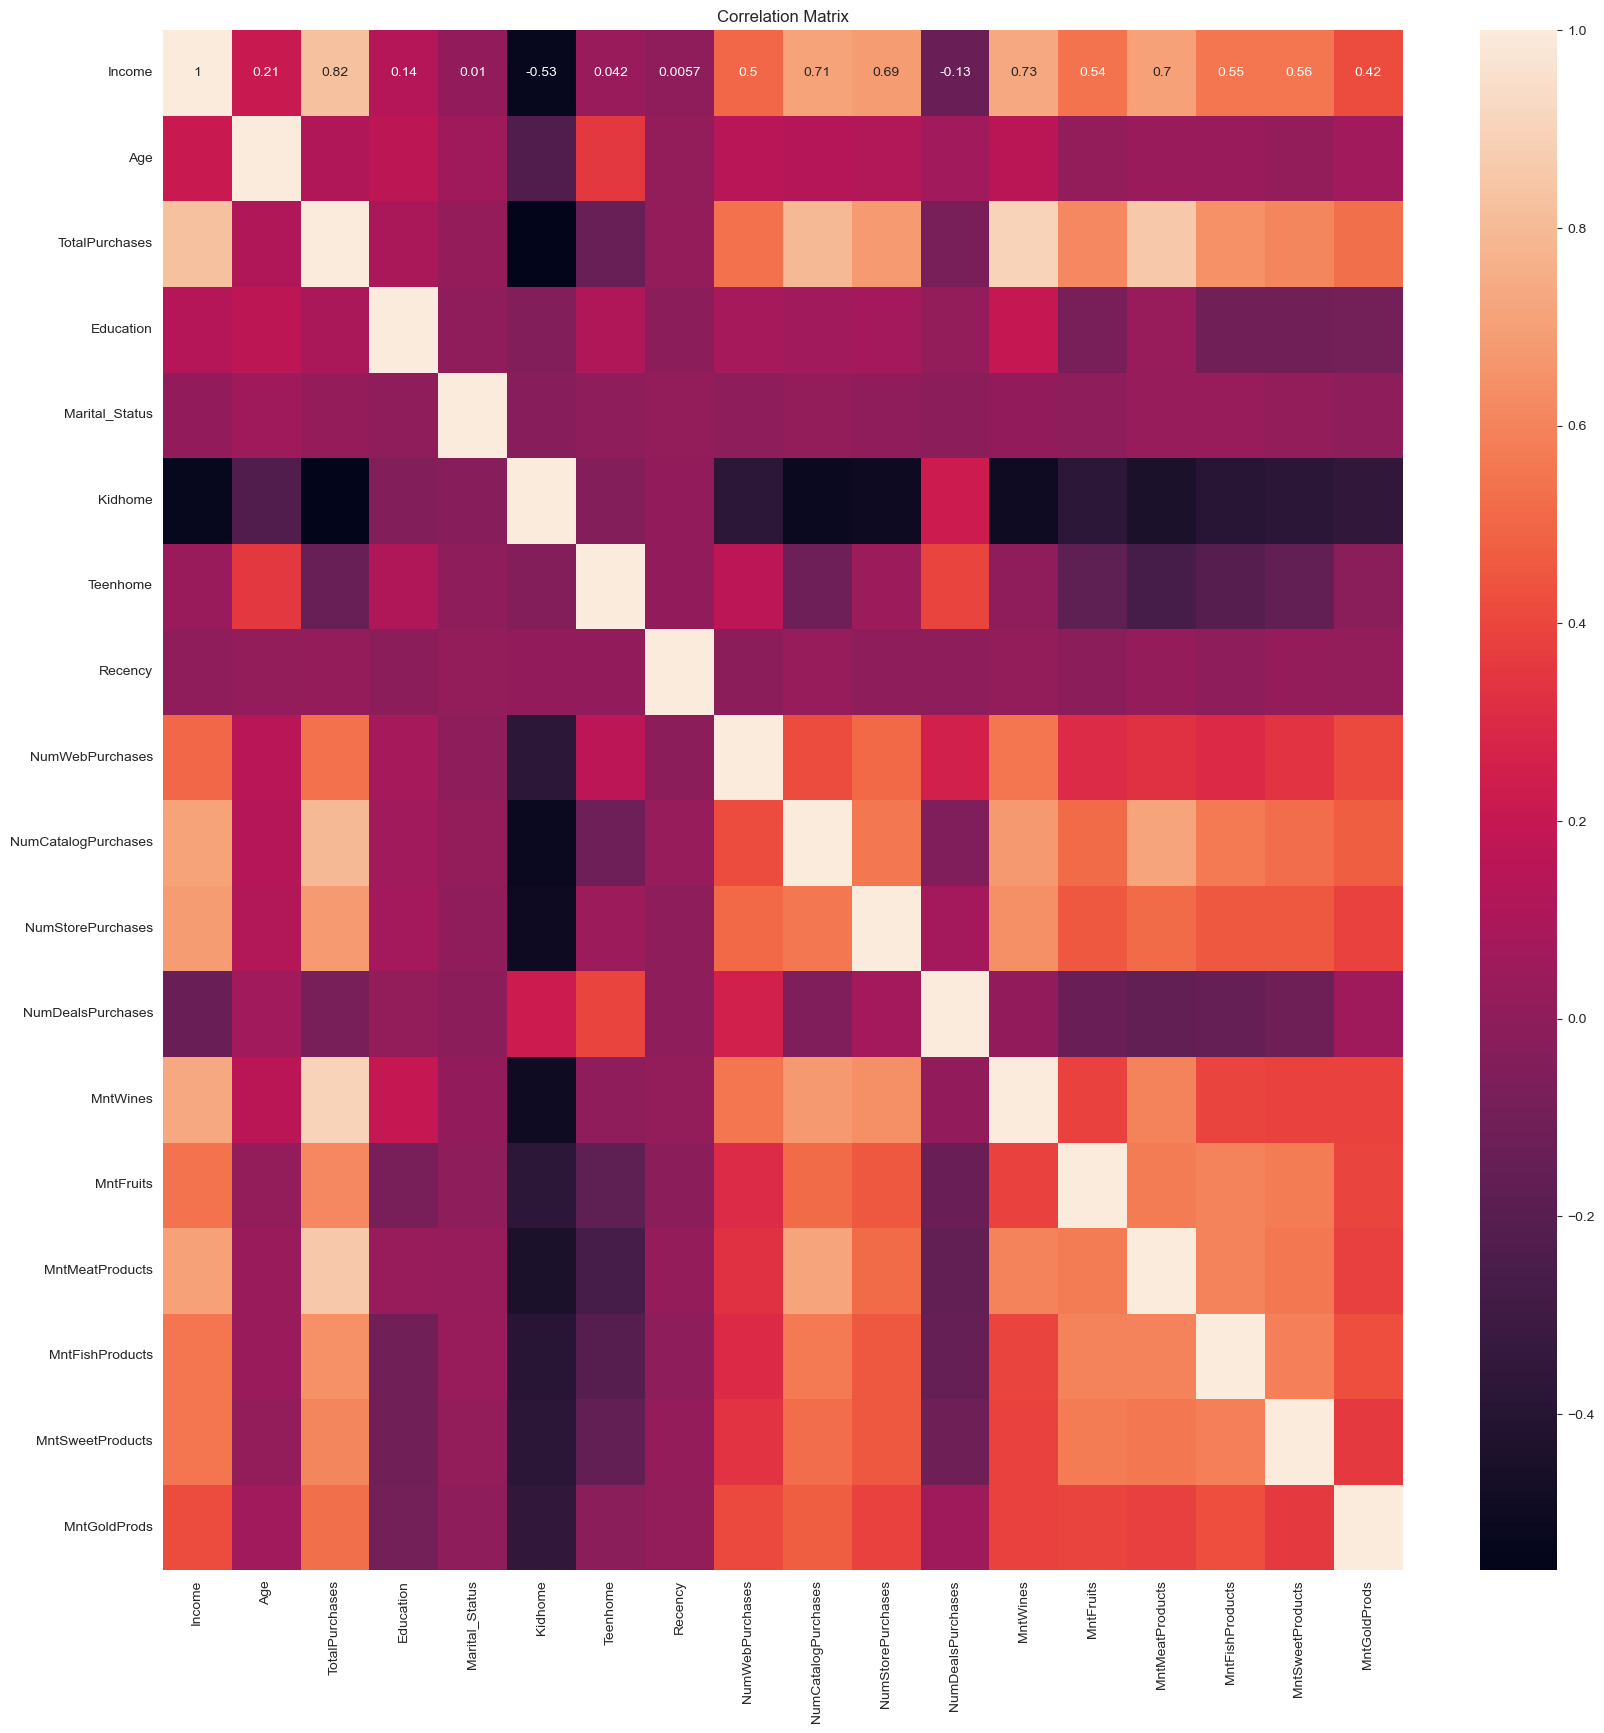

In [25]:
# now we can check the correlation between the features
plt.figure(figsize=(20, 20))
data_correlation = cluster_df.corr()
sns.heatmap(data_correlation, annot=True)
plt.title('Correlation Matrix')
plt.show()

/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

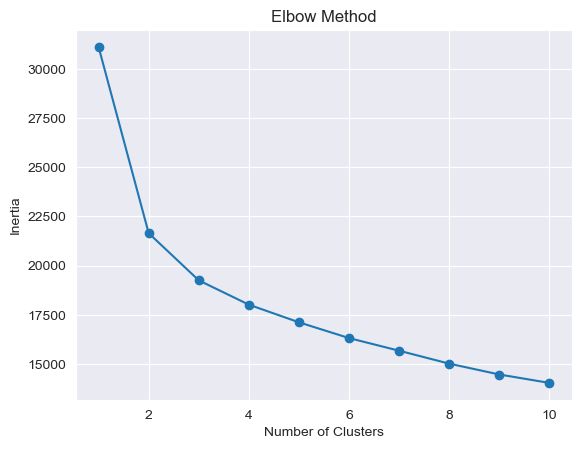

In [26]:
# KMeans clustering
k = range(1,11)
inertia = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cluster_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(k, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


##### Based on the elbow method, lets choose 3 as the number of clusters

In [27]:
# dimensionality reduction
pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(cluster_df)


/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

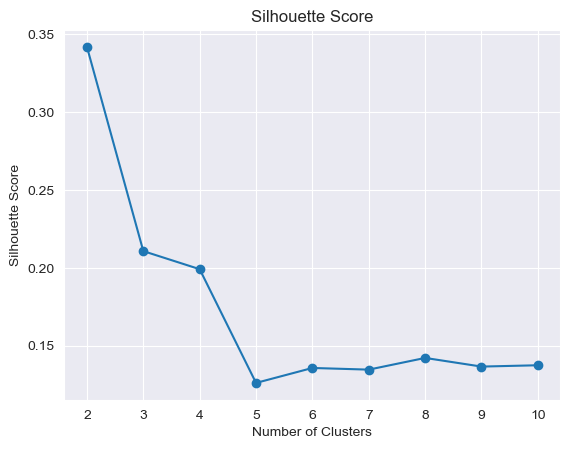

In [28]:
#Now lets evalute the clusters using the silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cluster_df)
    silhouette_scores.append(silhouette_score(pca_features, kmeans.labels_))
    
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [29]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=1)
kmeans.fit(pca_features)

KMeans(n_clusters=3, n_init=1, random_state=42)

In [30]:
print(kmeans.inertia_)
silhouette_score(pca_features, kmeans.labels_)

17725.955480937526


0.21044922430512844

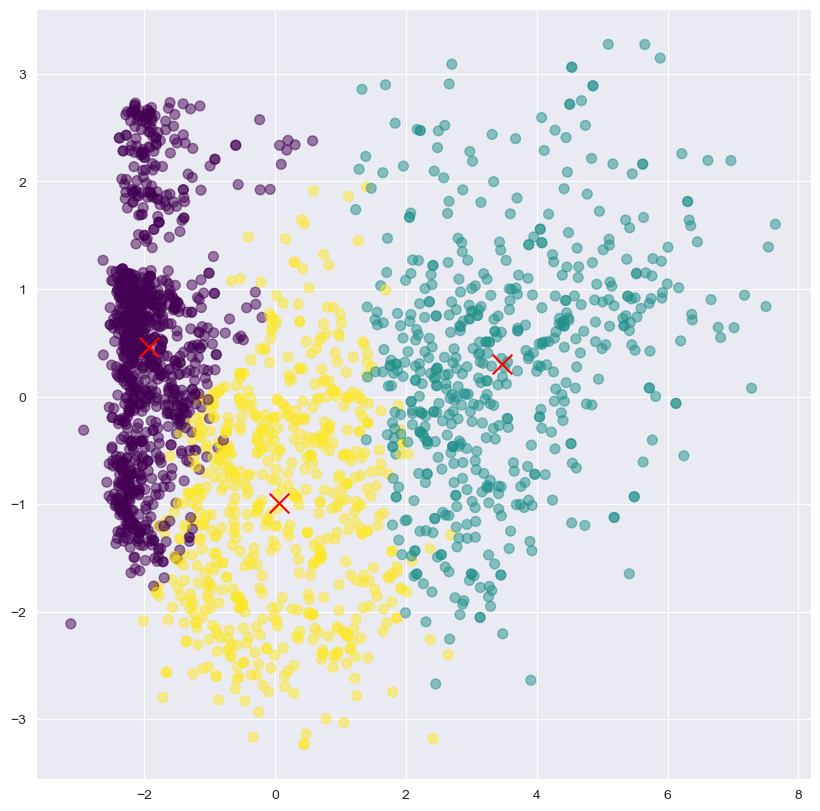

In [31]:
# Visualising the clusters
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 10))
plt.scatter(x = pca_features[:, 0], y = pca_features[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')



In [32]:
kmean_df = pd.DataFrame(data = cluster_df, columns = cluster_df.columns)
pred = kmeans.predict(pca_features)

kmean_df[features_to_scale] = scaler.inverse_transform(kmean_df[features_to_scale])
kmean_df['Cluster'] = pred + 1
kmean_df.head()

,Income,Age,TotalPurchases,Education,Marital_Status,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Cluster
0,"58,138.00",68.00,"1,617.00",2,4,0,0,58.00,8.00,10.00,4.00,3.00,635.00,88.00,546.00,172.00,88.00,88.00,2
1,"46,344.00",71.00,27.00,2,4,1,1,38.00,1.00,1.00,2.00,2.00,11.00,1.00,6.00,2.00,1.00,6.00,1
2,"71,613.00",60.00,776.00,2,5,0,0,26.00,8.00,2.00,10.00,1.00,426.00,49.00,127.00,111.00,21.00,42.00,3
3,"26,646.00",41.00,53.00,2,5,1,0,26.00,2.00,0.00,4.00,2.00,11.00,4.00,20.00,10.00,3.00,5.00,1
4,"58,293.00",44.00,422.00,4,3,1,0,94.00,5.00,3.00,6.00,5.00,173.00,43.00,118.00,46.00,27.00,15.00,3


/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packag

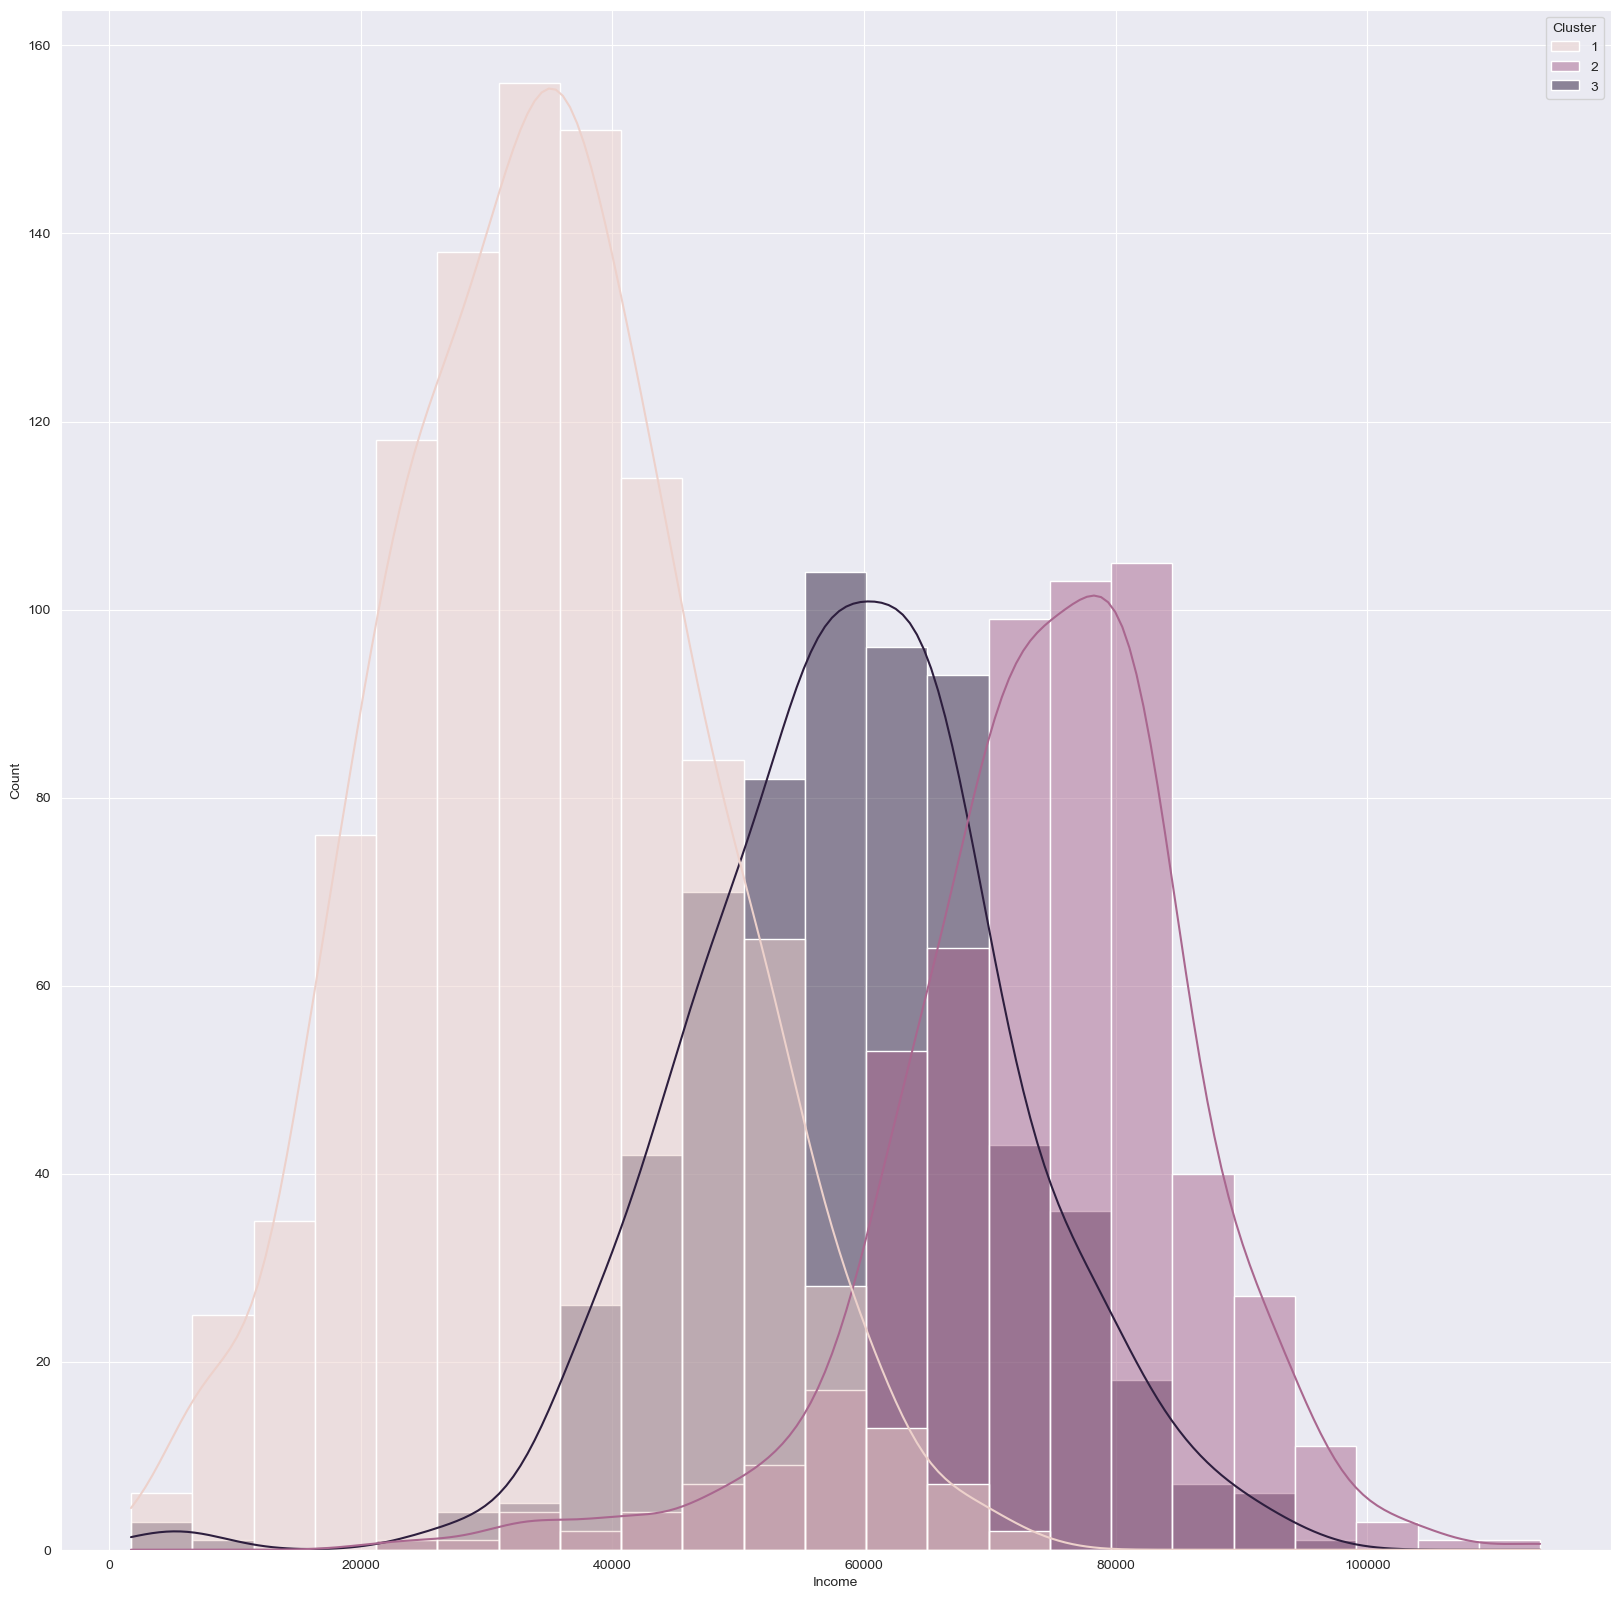

In [33]:
plt.figure(figsize=(20,20))
sns.histplot(data=kmean_df, x='Income', hue=kmean_df['Cluster'], kde=True)
plt.show()

In [34]:
# Analysing the properties of the different clusters to gain information about the different customer segments
kmean_df.groupby('Cluster')['Income'].mean()

Cluster
1              34,663.30
2              74,430.34
3              58,987.92
Name: Income, dtype: float64

/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packag

<Axes: xlabel='TotalPurchases', ylabel='Count'>

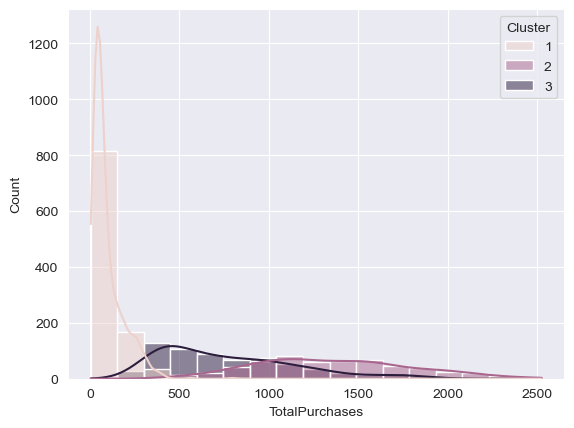

In [35]:
sns.histplot(data=kmean_df, x='TotalPurchases', hue=kmean_df['Cluster'], kde=True)

In [36]:
kmean_df.groupby('Cluster')['TotalPurchases'].mean()

Cluster
1                  95.65
2               1,360.18
3                 770.83
Name: TotalPurchases, dtype: float64

/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packag

<Axes: xlabel='Age', ylabel='Count'>

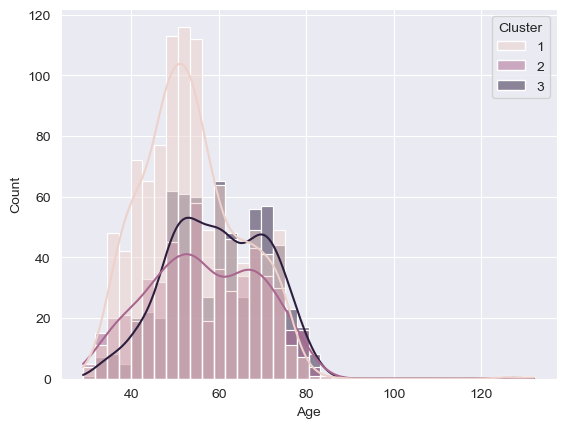

In [37]:
sns.histplot(data=kmean_df, x='Age', hue=kmean_df['Cluster'], kde=True)

In [38]:
kmean_df.groupby('Cluster')['Age'].mean()

Cluster
1                  53.70
2                  56.75
3                  59.68
Name: Age, dtype: float64

In [39]:
#seperating the clusters 
cluster_1 = kmean_df[kmean_df['Cluster'] == 1]
cluster_2 = kmean_df[kmean_df['Cluster'] == 2]
cluster_3 = kmean_df[kmean_df['Cluster'] == 3]

In [41]:
cluster_1.describe()
'''
Single = 4
Together = 5
Divorced = 2
Married = 3
'''

'''
Graduation = 2
PhD = 4
Master = 3
2n Cycle = 0 
Basic = 1
'''

,Income,Age,TotalPurchases,Education,Marital_Status,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Cluster
count,"1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00","1,018.00"
mean,"34,663.30",53.70,95.65,2.23,3.70,0.78,0.46,49.31,2.10,0.53,3.25,2.03,43.20,4.85,22.09,6.66,4.91,13.94,1.00
std,"12,431.43",11.45,86.03,1.15,1.04,0.50,0.52,29.22,1.27,0.67,1.12,1.37,58.36,7.46,22.22,9.13,6.97,13.96,0.00
min,"1,730.00",29.00,5.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"25,826.25",46.00,38.00,2.00,3.00,0.00,0.00,24.00,1.00,0.00,3.00,1.00,8.00,0.00,7.00,0.00,0.00,4.00,1.00
50%,"34,508.00",52.00,64.00,2.00,4.00,1.00,0.00,49.00,2.00,0.00,3.00,2.00,21.00,2.00,14.00,3.00,2.00,10.00,1.00
75%,"42,692.50",61.00,128.75,3.00,5.00,1.00,1.00,76.00,3.00,1.00,4.00,3.00,54.00,6.00,27.00,10.00,7.00,20.00,1.00
max,"73,395.00",132.00,797.00,4.00,6.00,2.00,2.00,99.00,9.00,4.00,9.00,15.00,691.00,70.00,130.00,84.00,62.00,108.00,1.00


The average income this custer is around 35k, which is the lowest of all the clusters, however the standard deviation is 12k, which indicates that the cluster has a lot of variance. The average education of this cluster is 2.23, which indicates that most in the cluster have no higher than a high education. This group has the lowest average age and also the highest kidHome coefficient, suggesting that this cluster is mostly made up of young families. This is reflected in their total purchases and also the amount spent on more premium products, like wine. 

In [44]:
cluster_2.describe()

,Income,Age,TotalPurchases,Education,Marital_Status,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Cluster
count,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00,552.00
mean,"74,430.34",56.75,"1,360.18",2.20,3.74,0.06,0.26,50.46,5.58,5.69,8.57,1.56,574.81,76.30,440.11,106.90,78.32,83.74,2.00
std,"11,569.48",12.89,431.87,1.08,1.09,0.24,0.46,29.39,2.45,2.41,2.85,1.47,307.92,49.38,233.24,64.40,51.00,60.56,0.00
min,"22,507.00",30.00,277.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,6.00,0.00,3.00,0.00,0.00,0.00,2.00
25%,"68,480.75",47.00,"1,038.50",2.00,3.00,0.00,0.00,26.00,4.00,4.00,6.00,1.00,340.00,33.75,253.00,55.00,37.00,35.00,2.00
50%,"75,336.00",56.00,"1,337.00",2.00,4.00,0.00,0.00,54.00,5.00,6.00,9.00,1.00,523.50,70.00,413.00,97.00,70.00,66.00,2.00
75%,"81,699.00",67.00,"1,645.50",3.00,5.00,0.00,1.00,76.00,7.00,7.00,11.00,2.00,783.25,108.00,597.00,151.00,114.25,121.00,2.00
max,"113,734.00",126.00,"2,525.00",4.00,6.00,2.00,2.00,99.00,27.00,11.00,13.00,15.00,"1,493.00",199.00,984.00,259.00,262.00,249.00,2.00


In cluster 2, the average income is much higher, (74k), which is the highest of all the clusters. There is also less variation in the income (11k).
The average age of the customers in this cluster is 57, which is higher than cluster 1, but lower than cluster 2.
Most of the members in the cluster are married, as the average marital status is 3.74.
Surprisingly, the customers in this cluster appear to be less educated than those in cluster 1, with an average score of 2.2
However, this cluster spends significantly more on premium items like wine (574.81) and gold (83.74).
In addition, their total spending is the largest of all the clusters (1360), and make the most purchases in store (8.57)

In [43]:
cluster_3.describe()

,Income,Age,TotalPurchases,Education,Marital_Status,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Cluster
count,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00
mean,"58,987.92",59.68,770.83,2.82,3.76,0.24,0.78,47.29,6.01,3.39,7.55,3.43,493.10,17.74,156.20,27.56,18.27,57.96,3.00
std,"12,618.54",11.08,382.76,0.99,1.13,0.45,0.52,28.04,2.49,2.37,2.71,2.36,314.94,18.07,135.24,29.95,19.79,53.14,0.00
min,"2,447.00",31.00,223.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,12.00,0.00,0.00,0.00,3.00
25%,"50,914.75",51.00,451.00,2.00,3.00,0.00,0.00,24.00,4.00,2.00,5.00,2.00,245.00,4.00,71.00,6.00,3.00,20.00,3.00
50%,"59,173.00",60.00,684.50,3.00,3.50,0.00,1.00,48.00,6.00,3.00,7.00,3.00,420.50,12.00,123.00,17.00,12.00,40.00,3.00
75%,"66,479.00",69.00,"1,001.00",4.00,5.00,0.00,1.00,70.00,7.00,4.00,10.00,5.00,656.00,26.00,203.75,39.00,27.00,80.00,3.00
max,"95,169.00",82.00,"2,053.00",4.00,7.00,2.00,2.00,99.00,25.00,28.00,13.00,15.00,"1,486.00",103.00,"1,725.00",160.00,114.00,321.00,3.00


In cluster 3, the average income is 59k, which is higher than cluster 1, but lower than cluster 3. Additionally, there is more variation in this group compared to cluster 2's.
This is the oldest cluster on average, and this is reflected by the fact that the homes in this cluster were most likely to have a teenager in them.
Customers in this clusters spend less than cluster 2, but more than cluster 1, and make purchases from stores less frequently.
This indicates that customers in this cluster are likely more middle class and established families.